In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/RAJ BATHANI/Downloads/TimeSeries Datasets/Temperature.csv", index_col = ['Date'], parse_dates = ['Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tempmin  3652 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB


In [4]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq=None)

In [5]:
df.index.freq = 'D'

In [6]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq='D')

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
adfuller(df['tempmin'])

(-4.441196369836983,
 0.0002507763025241529,
 20,
 3631,
 {'1%': -3.4321522387754775,
  '5%': -2.862336328589075,
  '10%': -2.567193897993964},
 16650.311926169066)

In [9]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_test(df['tempmin'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.441196
p-value                    0.000251
# lags used               20.000000
# observations          3631.000000
critical value (1%)       -3.432152
critical value (5%)       -2.862336
critical value (10%)      -2.567194
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


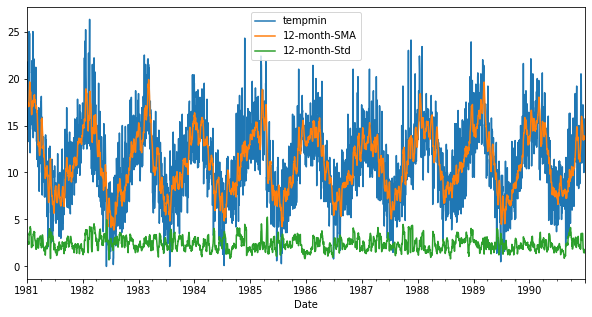

In [11]:
df['12-month-SMA'] = df['tempmin'].rolling(window=12).mean()
df['12-month-Std'] = df['tempmin'].rolling(window=12).std()

df[['tempmin','12-month-SMA','12-month-Std']].plot(figsize = (10,5));

In [12]:
#ACF and PACF

In [13]:
import statsmodels.api as sm

In [14]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [15]:
from pandas.plotting import lag_plot

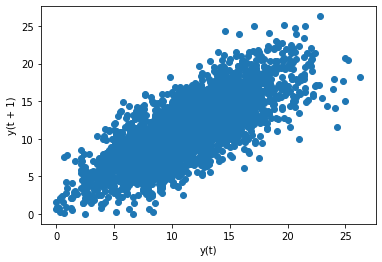

In [16]:
lag_plot(df['tempmin'])

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

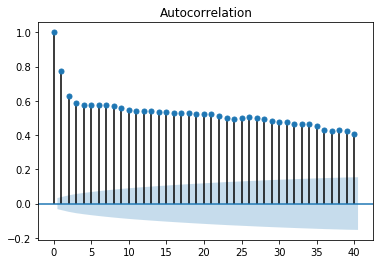

In [24]:
plot_acf(df['tempmin'], lags=40);

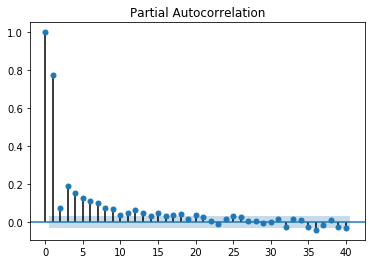

In [23]:
plot_pacf(df['tempmin'], lags=40);

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 1981-01-01 to 1990-12-31
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tempmin  3652 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB


In [ ]:
l 